In [121]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [122]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8

sb.set_style('whitegrid')

In [123]:
pc1 = pd.read_csv('D:\Python\PC1.csv', sep=',')
pc3 = pd.read_csv('D:\Python\PC3.csv', sep=',')
pc4 = pd.read_csv('D:\Python\PC4.csv', sep=',')

In [124]:
len_pc1 = len(pc1)
len_pc3 = len(pc3)
len_pc4 = len(pc4)

data = [len_pc1, len_pc3, len_pc4]
columns =  ['   ']
index = ['PC1', 'PC3', 'PC4']
df = pd.DataFrame(data, columns=columns, index=index)
print(df)

         
PC1   679
PC3  1053
PC4  1270


In [165]:
pc1['Defective'],_ = pd.factorize(pc1['Defective'])
pc1['Defective'] = 1 - pc1['Defective']
pc3['Defective'],_ = pd.factorize(pc3['Defective'])
pc4['Defective'],_ = pd.factorize(pc4['Defective'])
pc1.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,1,7,7,0,5,6,12,4,0.17,6,...,11,0.11,56,60,21,12,38,36.67,24,1
1,2,0,5,3,1,0,8,3,0.33,4,...,11,0.30,14,16,11,9,10,11.11,9,0
2,3,5,11,7,5,10,20,6,0.14,10,...,27,0.10,95,126,69,12,58,28.85,42,0
3,4,11,13,1,0,6,18,7,0.22,6,...,18,0.14,86,96,29,20,50,15.79,32,0
4,5,8,13,6,0,7,20,7,0.25,10,...,21,0.16,56,69,30,17,44,20.00,28,0


Text(0, 0.5, 'Percentage')

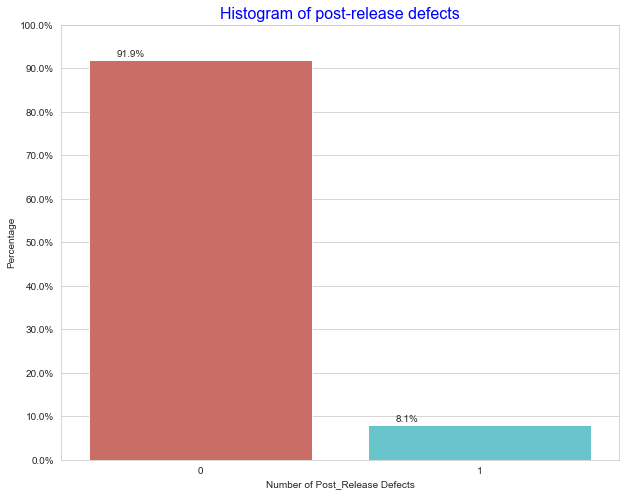

In [166]:
def histogram_of_post(data):
    total = len(data)
    ax = sb.countplot(x='Defective',data=data, palette='hls')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    _ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    return ax;
ax = histogram_of_post(pc1)
plt.title('Histogram of post-release defects',color = 'blue',fontsize=16)
plt.xlabel('Number of Post_Release Defects')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

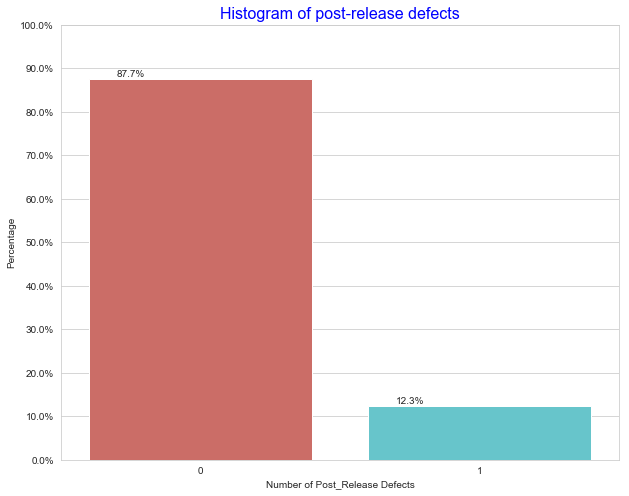

In [167]:
ax = histogram_of_post(pc3)
plt.title('Histogram of post-release defects',color = 'blue',fontsize=16)
plt.xlabel('Number of Post_Release Defects')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

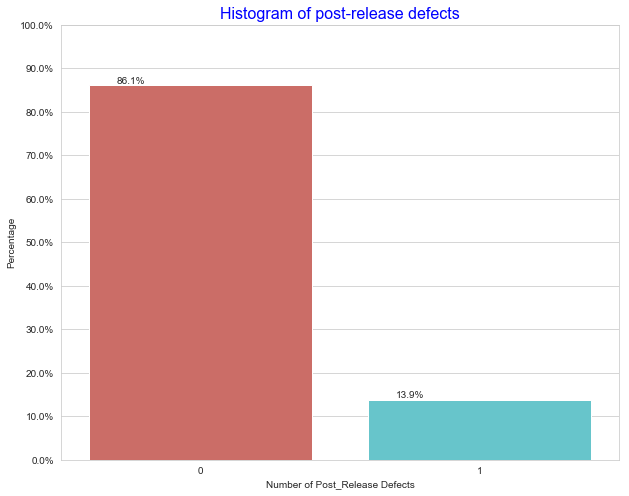

In [168]:
ax = histogram_of_post(pc4)
plt.title('Histogram of post-release defects',color = 'blue',fontsize=16)
plt.xlabel('Number of Post_Release Defects')
plt.ylabel('Percentage')

In [223]:
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
def ranking(train, test):
    X = train[['LOC_BLANK', 'BRANCH_COUNT','CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS','NUM_UNIQUE_OPERANDS','NUM_UNIQUE_OPERATORS','NUMBER_OF_LINES','PERCENT_COMMENTS','LOC_TOTAL']]
    Y = train['Defective']
    lm = LinearRegression()
    lm.fit(X, Y)
    R2 = round(lm.score(X, Y), 3)
    X_test = test[['LOC_BLANK', 'BRANCH_COUNT','CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS','NUM_UNIQUE_OPERANDS','NUM_UNIQUE_OPERATORS','NUMBER_OF_LINES','PERCENT_COMMENTS','LOC_TOTAL']]
    Y_pred = lm.predict(X_test)
    Y_post = test['Defective']
    pear = round(pearsonr(Y_post, Y_pred)[0], 3)
    spear = round(spearmanr(Y_post, Y_pred)[0], 3)
    rank = [R2, pear, spear]
    return rank;

In [254]:
data_file = [pc1, pc4]
release = ['PC1', 'PC4']
print ('Ranking files with linear regression (Pearson and Spearman correlation)')
print ('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------'))
print ('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'R2','Pearson','Spearman'))
print ('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------'))
for i in range (0, 2):
    for j in range (0, 2):
        r = ranking(data_file [i], data_file [j])
        print ('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j], r[0],r[1],r[2]))
print ('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------'))

Ranking files with linear regression (Pearson and Spearman correlation)
+ ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     R2     |  Pearson   |  Spearman  |
+ ---------- + ---------- + ---------- + ---------- + ---------- +
|    PC1     |    PC1     |   0.258    |   0.508    |    0.37    |
|    PC1     |    PC4     |   0.258    |    0.08    |   0.182    |
|    PC4     |    PC1     |   0.329    |   -0.076   |   0.021    |
|    PC4     |    PC4     |   0.329    |   0.574    |   0.493    |
+ ---------- + ---------- + ---------- + ---------- + ---------- +


In [255]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def classification(train, test):
    formula = '(Defective>0) ~ LOC_BLANK + BRANCH_COUNT+CALL_PAIRS + LOC_CODE_AND_COMMENT + LOC_COMMENTS + CONDITION_COUNT + CYCLOMATIC_COMPLEXITY + CYCLOMATIC_DENSITY + DECISION_COUNT + DECISION_DENSITY + DESIGN_COMPLEXITY + DESIGN_DENSITY + EDGE_COUNT + ESSENTIAL_COMPLEXITY + ESSENTIAL_DENSITY + LOC_EXECUTABLE + PARAMETER_COUNT + HALSTEAD_CONTENT + HALSTEAD_DIFFICULTY + HALSTEAD_EFFORT + HALSTEAD_ERROR_EST + HALSTEAD_LENGTH + HALSTEAD_LEVEL + HALSTEAD_PROG_TIME + HALSTEAD_VOLUME + MAINTENANCE_SEVERITY + MODIFIED_CONDITION_COUNT + MULTIPLE_CONDITION_COUNT + NODE_COUNT + NORMALIZED_CYLOMATIC_COMPLEXITY + NUM_OPERANDS + NUM_OPERATORS + NUM_UNIQUE_OPERANDS + NUM_UNIQUE_OPERATORS + NUMBER_OF_LINES + PERCENT_COMMENTS + LOC_TOTAL'
    model = smf.glm(formula=formula, data=train, family=sm.families.Binomial())
    result = model.fit()
    predictions = result.predict(test)
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(test['Defective'])):
        if test['Defective'][i] > 0 and predictions[i] > 0.5 :
            FN = FN + 1
        elif test['Defective'][i] > 0 and (not(predictions[i] > 0.5)) :
            TP = TP + 1
        elif (not(test['Defective'][i] > 0)) and predictions[i] > 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)), 3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;


In [257]:
Pf1 = []
Rf1 = []
Accf1 = []
Ff1 = []
print('Classification of files.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 2):
    for j in range (0, 2):
        r = classification(data_file [i], data_file [j])
        Pf1.append(r[1])
        Rf1.append(r[2])
        Accf1.append(r[3])
        Ff1.append(r[0])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j], r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of files.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    PC1     |    PC1     |   0.679    |   0.345    |   0.934    |   0.458    |
|    PC1     |    PC4     |    0.5     |   0.119    |   0.861    |   0.192    |
|    PC4     |    PC1     |    0.15    |   0.055    |   0.898    |    0.08    |
|    PC4     |    PC4     |   0.795    |   0.528    |   0.916    |   0.635    |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +


In [258]:
from sklearn import tree
import graphviz
import pydotplus
def decision_tree(train, test):
    X = train[['LOC_BLANK', 'BRANCH_COUNT','CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS','NUM_UNIQUE_OPERANDS','NUM_UNIQUE_OPERATORS','NUMBER_OF_LINES','PERCENT_COMMENTS','LOC_TOTAL']]
    Y = train['Defective']
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X, Y)
    X_test = test[['LOC_BLANK', 'BRANCH_COUNT','CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS','NUM_UNIQUE_OPERANDS','NUM_UNIQUE_OPERATORS','NUMBER_OF_LINES','PERCENT_COMMENTS','LOC_TOTAL']]
    Y_pred = clf.predict(X_test)
    Y_post = test['Defective']
    #feature_names = X.columns
    #dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 6, feature_names=feature_names)
    #graphh = pydotplus.graph_from_dot_data(dot_data)
    #graphh.write_pdf("D:/Python/graph1.pdf")
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;

In [259]:
def decision_trees(files):
    X = files[['LOC_BLANK', 'BRANCH_COUNT','CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS','NUM_UNIQUE_OPERANDS','NUM_UNIQUE_OPERATORS','NUMBER_OF_LINES','PERCENT_COMMENTS','LOC_TOTAL']]
    Y = files['Defective']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    X_test.index = range(len(X_test.index))
    Y_test.index = range(len(Y_test.index))
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    Y_post = Y_test
    #feature_names = X.columns
    #dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 6, feature_names=feature_names)
    #graphh = pydotplus.graph_from_dot_data(dot_data)
    #graphh.write_pdf("D:/Python/graph1.pdf")
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;

In [260]:
Pf2 = []
Rf2 = []
Accf2 = []
Ff2 = []
print('Classification of files.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 2):
    for j in range (0, 2):
        if i == j:
            r = decision_trees(data_file [i])
        else:
            r = decision_tree(data_file [i], data_file [j])
        Ff2.append(r[0])
        Pf2.append(r[1])
        Rf2.append(r[2])
        Accf2.append(r[3])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j],r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of files.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    PC1     |    PC1     |   0.227    |    0.25    |   0.843    |   0.238    |
|    PC1     |    PC4     |   0.322    |   0.324    |   0.812    |   0.323    |
|    PC4     |    PC1     |   0.226    |   0.255    |   0.869    |    0.24    |
|    PC4     |    PC4     |   0.533    |   0.453    |   0.869    |    0.49    |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +


In [261]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [262]:
def random_forest(train, test):
    X = train[['LOC_BLANK', 'BRANCH_COUNT','CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS','NUM_UNIQUE_OPERANDS','NUM_UNIQUE_OPERATORS','NUMBER_OF_LINES','PERCENT_COMMENTS','LOC_TOTAL']]
    Y = train['Defective']
    Yy = {}
    for i in range(len(train['Defective'])):
        if Y[i] > 0 :
            Yy[i] = 1;
        else:
            Yy[i] = 0
    dict_new = {
        'Defective': Yy
    }
    yy = pd.DataFrame(dict_new)
    Y = yy['Defective']
    regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
    regr.fit(X, Y)
    X_test = test[['LOC_BLANK', 'BRANCH_COUNT','CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS','NUM_UNIQUE_OPERANDS','NUM_UNIQUE_OPERATORS','NUMBER_OF_LINES','PERCENT_COMMENTS','LOC_TOTAL']]
    Y_pred = regr.predict(X_test)
    Y_post = test['Defective']
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;


In [264]:
Pf3 = []
Rf3 = []
Accf3 = []
Ff3 = []
print('Classification of files.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing','P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 2):
    for j in range (0, 2):
        r = random_forest(data_file [i], data_file [j])
        Ff3.append(r[0])
        Pf3.append(r[1])
        Rf3.append(r[2])
        Accf3.append(r[3])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j],r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of files.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    PC1     |    PC1     |   0.929    |   0.236    |   0.937    |   0.376    |
|    PC1     |    PC4     |   0.111    |   0.006    |   0.856    |   0.011    |
|    PC4     |    PC1     |   0.524    |    0.2     |    0.92    |    0.29    |
|    PC4     |    PC4     |   0.722    |   0.295    |   0.887    |   0.419    |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
